In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv("penguins.csv")

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [4]:
df.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
species              333 non-null object
island               333 non-null object
bill_length_mm       333 non-null float64
bill_depth_mm        333 non-null float64
flipper_length_mm    333 non-null int64
body_mass_g          333 non-null int64
sex                  333 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [7]:
df["species"].unique().tolist()

['Adelie', 'Gentoo', 'Chinstrap']

In [8]:
df["island"].unique().tolist()

['Torgersen', 'Biscoe', 'Dream']

In [9]:
df["sex"].unique().tolist()

['male', 'female']

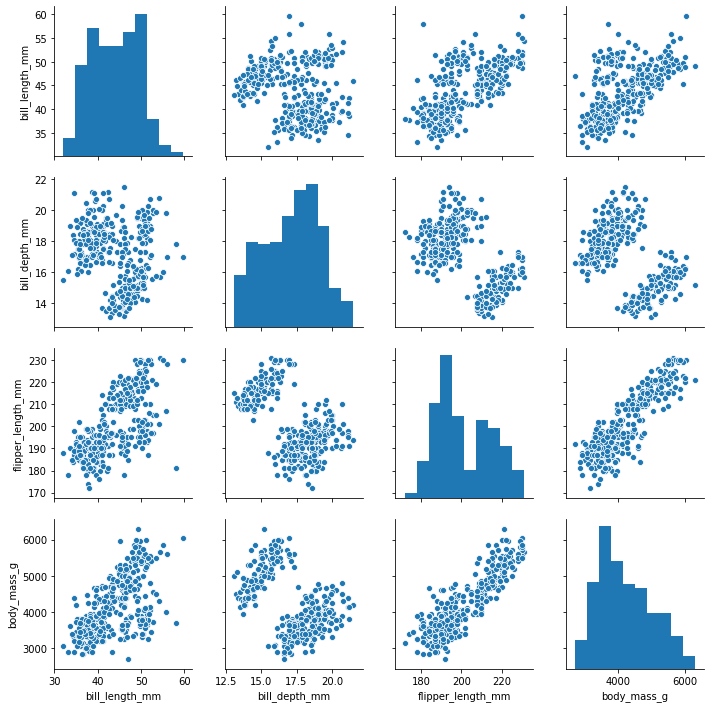

In [10]:
sns.pairplot(df)

In [11]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male


In [12]:
to_encode=["island", "sex"]
for col in to_encode:
    dummy=pd.get_dummies(df[col], prefix=col)
    df=pd.concat([df,dummy], axis=1)
    del df[col]

In [13]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181,3750,0,0,1,0,1
1,Adelie,39.5,17.4,186,3800,0,0,1,1,0
2,Adelie,40.3,18.0,195,3250,0,0,1,1,0
3,Adelie,36.7,19.3,193,3450,0,0,1,1,0
4,Adelie,39.3,20.6,190,3650,0,0,1,0,1


In [14]:
y=df["species"]
X=df.drop("species", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  0  0]
 [ 2 14  0]
 [ 0  0 26]]
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        25
   Chinstrap       1.00      0.88      0.93        16
      Gentoo       1.00      1.00      1.00        26

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



In [19]:
y_pred = svclassifier.predict(X)
series = pd.Series(y_pred)
df_result= pd.concat([X, series], axis=1)

In [20]:
df_result.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,0
0,39.1,18.7,181,3750,0,0,1,0,1,Adelie
1,39.5,17.4,186,3800,0,0,1,1,0,Adelie
2,40.3,18.0,195,3250,0,0,1,1,0,Adelie
3,36.7,19.3,193,3450,0,0,1,1,0,Adelie
4,39.3,20.6,190,3650,0,0,1,0,1,Adelie


[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

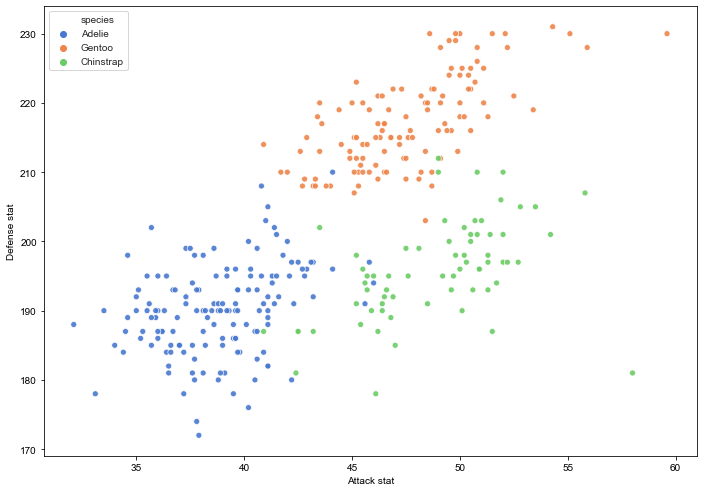

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['bill_length_mm']
Y=df['flipper_length_mm']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df["species"],
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'bill_length')]

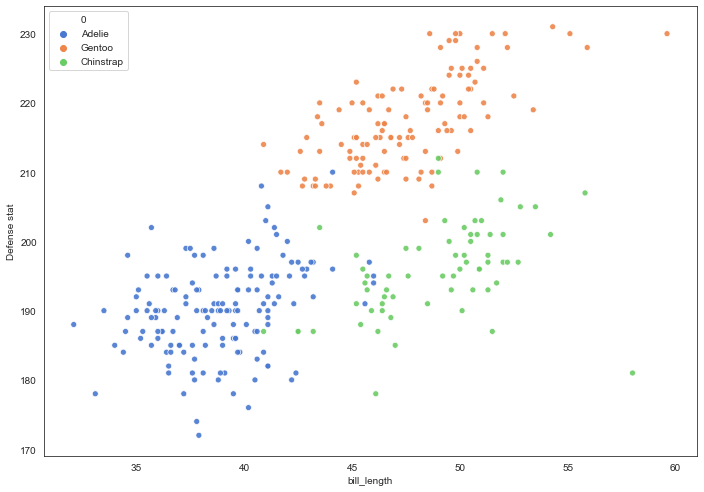

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df_result['bill_length_mm']
Y=df_result['flipper_length_mm']
ax = sns.scatterplot(x=X, y=Y, data=df_result,  
                     hue=df_result[0], 
                     alpha=.9, palette="muted")
ax.set(xlabel='bill_length', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

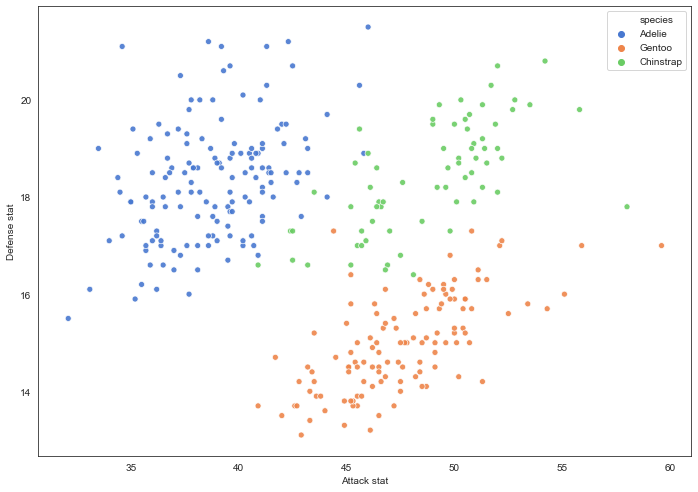

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['bill_length_mm']
Y=df['bill_depth_mm']
ax = sns.scatterplot(x=X, y=Y, data=df,  
                     hue=df["species"],
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

[Text(0, 0.5, 'Defense stat'), Text(0.5, 0, 'Attack stat')]

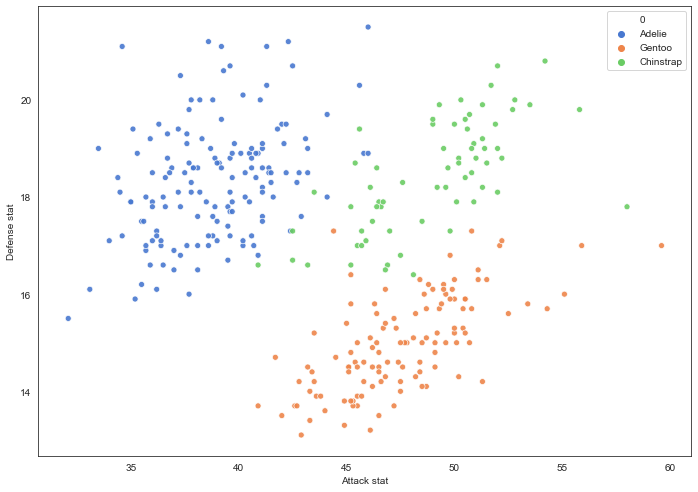

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df_result['bill_length_mm']
Y=df_result['bill_depth_mm']
ax = sns.scatterplot(x=X, y=Y, data=df_result,  
                     hue=df_result[0], 
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')

In [26]:
filename = 'model.pkl'
pickle.dump(svclassifier, open(filename, 'wb'))

In [27]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9701492537313433
